# Utilities

In [1]:
import pandas as pd
from typing import Optional, Sequence, Tuple

from datetime import datetime, timedelta
from matplotlib import pyplot as plt

import statsmodels
import statsmodels.tsa.seasonal
import statsmodels.tsa.statespace.sarimax
import statsmodels.tsa.stattools

pd.plotting.register_matplotlib_converters()
plt.rc("figure", figsize=(16, 4))
plt.rc("font", size=8)
plt.style.use("seaborn-v0_8-darkgrid")

# NAB

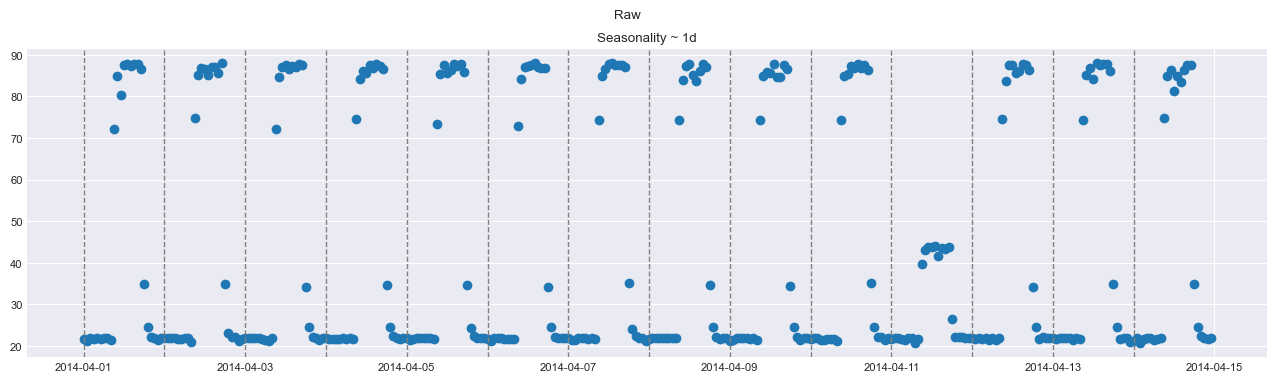

In [8]:
def plot_ts(title: str, df: pd.DataFrame, expected_seasonality: Optional[str]):
    plt.figure()
    
    plt.scatter(x=df.index, y=df['value'])
    plt.suptitle(title)
    plt.title(f"Seasonality ~ {expected_seasonality}")

    if expected_seasonality is not None:
        for date in pd.date_range(min(df.index), max(df.index), freq=expected_seasonality):
            plt.axvline(x=date, linewidth=1, linestyle="--", color='gray')

df = pd.read_csv('../data/artificialWithAnomaly/art_daily_jumpsdown.csv', parse_dates=["timestamp"])
df = df.set_index("timestamp")
df = df.resample("1h").max()

plot_ts('Raw', df, expected_seasonality="1d")

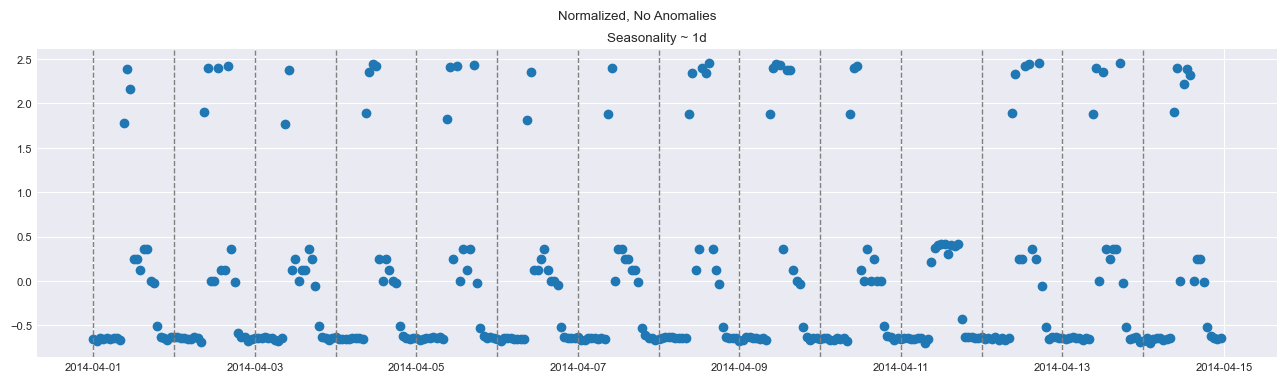

In [12]:
# Replace values that are above p95 with the mean
df.where(df < df.quantile(0.95).iloc[0], inplace=True)
df.fillna(df.mean(), inplace=True)

# Normalization
df = (df - df.mean()) / (df.std() + 1e-5)

plot_ts("Normalized, No Anomalies", df, expected_seasonality="1d")

In [ ]:
df = pd.read_csv('../assets/data/artificialWithAnomaly/art_daily_jumpsdown.csv', parse_dates=["timestamp"])
df = analyze_nab("NAB, With anomaly, Art daily jumpsdown", df)

In [13]:
# Cut the timeseries s.t. left of 2014/4/9 is training data
cutoff = datetime(2014, 4, 9)
train = df[:cutoff]
test = df[cutoff + timedelta(days=1):]

plt.subplots(1, 2)
pacf = statsmodels.tsa.stattools.pacf(train, nlags=12)
plt.subplot(1, 2, 1)
plt.title("pacf")
plt.bar(x=range(len(pacf)), height=pacf)

plt.subplot(1, 2, 2)
plt.title("acf")
acf = statsmodels.tsa.stattools.acf(train, nlags=48)
plt.bar(x=range(len(acf)), height=acf)

sarimax = statsmodels.tsa.statespace.sarimax.SARIMAX(
    train,
    order=(23, 0, 0),
    seasonal_order=(1, 1, 1, 24))

result = sarimax.fit(disp=False, maxiter=2000)
print(result.summary())

prediction = result.get_prediction(min(test.index), max(test.index))
confidence = prediction.conf_int(alpha=0.1)

plt.figure()
plt.plot(df, label="real", linewidth=3)
plt.plot(prediction.predicted_mean, label="predicted", linewidth=2)

plt.fill_between(
    confidence.index[1:],
    confidence.iloc[1:,0],
    confidence.iloc[1:,1],
    alpha=0.2,
    facecolor="green")

plt.legend()

IndentationError: unexpected indent (1984331925.py, line 6)

/Users/il032650/src/ts-anomaly-detection-research/.venv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/il032650/src/ts-anomaly-detection-research/.venv/lib/python3.12/site-packages/statsmodels/tsa/statespace/mlemodel.py:3014: RuntimeWarning: divide by zero encountered in divide
  return self.params / self.bse


                                       SARIMAX Results                                       
Dep. Variable:                                 value   No. Observations:                  193
Model:             SARIMAX(23, 0, 0)x(1, 1, [1], 24)   Log Likelihood                1718.969
Date:                               Thu, 04 Jul 2024   AIC                          -3385.939
Time:                                       13:26:04   BIC                          -3304.561
Sample:                                   04-01-2014   HQIC                         -3352.914
                                        - 04-09-2014                                         
Covariance Type:                                 opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1       4.825e-16         -0       -inf      0.000    4.83e-16    4.83e-16
ar.L2      

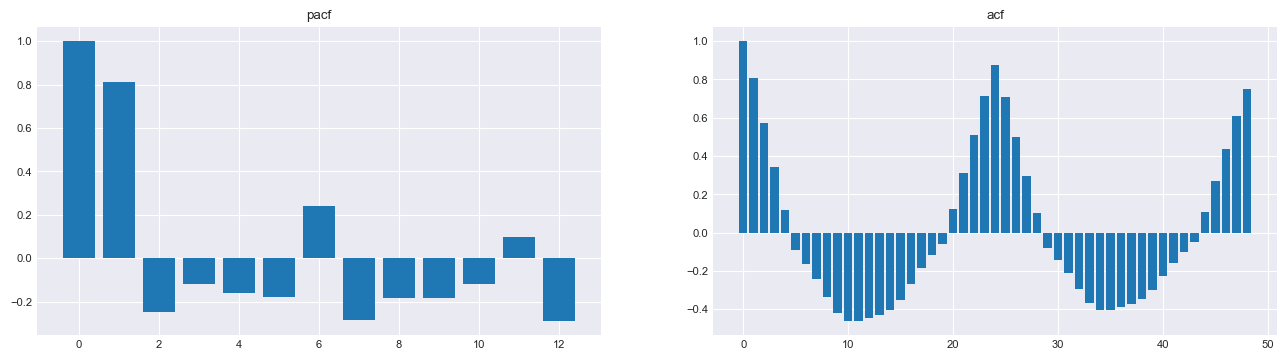

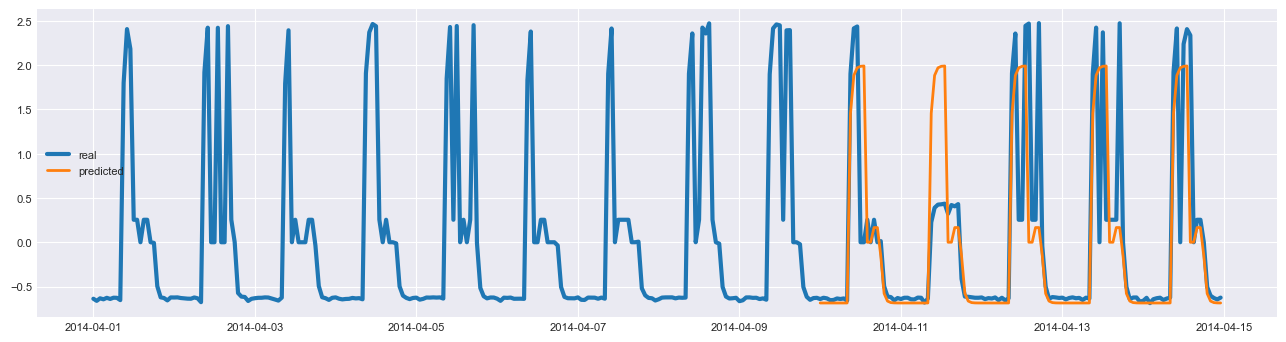

In [56]:
def eval_sarimax(df_orginal: pd.DataFrame, df_train: pd.DataFrame, df_test: pd.DataFrame):
   

# eval_sarimax(df_no_anomaly, df_train_no_anomaly, df_test_no_anomaly)
eval_sarimax(df_with_anomaly, df_train_with_anomaly, df_test_with_anomaly)